An analysis of a survey about the Star Wars movies.

Problem statament and data are from Dataquest: https://www.dataquest.io/m/201/guided-project%3A-star-wars-survey
(Link requires Dataquest subscription.)

In [1]:
#setting up the dataframe
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
#removing any rows without a respondent id
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [4]:
#turning yes/no questions into boolean values
yes_no = {
    "Yes": True,
    "No": False
}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
#cleaning up results from "which films have you seen?" question
import numpy as np
seen = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen)

In [6]:
seen_names = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}
star_wars = star_wars.rename(columns=seen_names)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
#cleaning up preference rankings
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
ranking_names = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}
star_wars = star_wars.rename(columns=ranking_names)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
#finding mean rankings for each movie (lower number = better ranking)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
means = star_wars[star_wars.columns[9:15]].mean()
means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

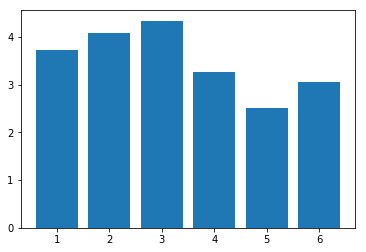

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar([1, 2, 3, 4, 5, 6], means)
plt.show()

Empire Strikes Back did best, which fits its popularity. The prequels all ranked worse than the original trilogy, which is also unsurprising, but considering how heavily criticized The Phantom Menace is, I was surprised it ranked better than the other two prequels.

In [10]:
#tallying how many respondents have seen each movie
seen_counts = star_wars[star_wars.columns[3:9]].sum()
seen_counts

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

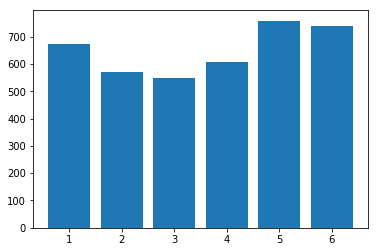

In [11]:
plt.bar([1, 2, 3, 4, 5, 6], seen_counts)
plt.show()

In general, higher-rated movies are have been seen more, with the exception of Phantom Menace vs A New Hope. But I was surprised to see A New Hope to in fourth place, and especially that its direct sequels were seen by more respondents than it.

In [12]:
#creating gender-specific dataframes, so they can be analyzed independently
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [13]:
#finding mean rankings among male respondents
means_male = males[star_wars.columns[9:15]].mean()
means_male

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [14]:
#finding mean rankings among female respondents
means_female = females[star_wars.columns[9:15]].mean()
means_female

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

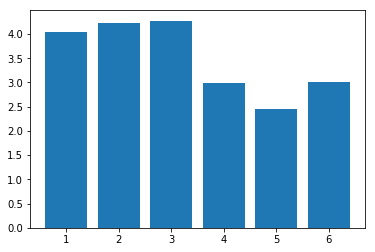

In [15]:
plt.bar([1, 2, 3, 4, 5, 6], means_male)
plt.show()

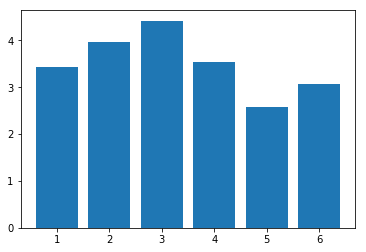

In [16]:
plt.bar([1, 2, 3, 4, 5, 6], means_female)
plt.show()

Women reported liking episodes 1 and 2 more, and episodes 3, 4, and less. 6 is pretty similar regardless of gender.

4 and 5 were smaller differences than the first three movies, and the relative rankings are similar to the overall, with the only difference being women rating episode 1 slightly higher than episode 4.

In [17]:
seen_male = males[star_wars.columns[3:9]].sum()
seen_male

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [18]:
seen_female = females[star_wars.columns[3:9]].sum()
seen_female

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

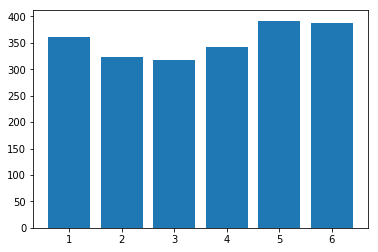

In [19]:
plt.bar([1, 2, 3, 4, 5, 6], seen_male)
plt.show()

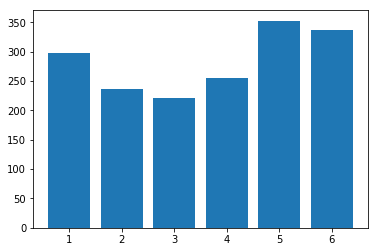

In [20]:
plt.bar([1, 2, 3, 4, 5, 6], seen_female)
plt.show()

In [21]:
males.shape

(497, 38)

In [22]:
females.shape

(549, 38)

Among survey respondents, all six movies were seen by more men than women. More women than men responded to the survey, so differences in response number by gender increase the difference rather than decreasing it.

For both men and women, the order of movies from most to least often seen is the same as overall.

In [23]:
fields = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
fields.iloc[0]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [24]:
#character rankings
han_rankings = star_wars["Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."]
ranks = []
for i in han_rankings:
    if i not in ranks:
        ranks.append(i)
ranks

['Very favorably',
 nan,
 'Somewhat favorably',
 'Neither favorably nor unfavorably (neutral)',
 'Somewhat unfavorably',
 'Unfamiliar (N/A)',
 'Very unfavorably']

In [25]:
ranks = ["Very favorably", "Somewhat favorably", "Neither favorably nor unfavorably (neutral)", 
         "Somewhat unfavorably", "Very unfavorably", "Unfamiliar (N/A)"]
def tally_rankings(char_rankings, ranks):
    ranks_dict = {}
    for i in ranks:
        ranks_dict[i] = 0
    for i in char_rankings:
        if i in ranks:
            ranks_dict[i] += 1
    return ranks_dict
han_tallies = tally_rankings(han_rankings, ranks)
han_tallies

{'Very favorably': 610,
 'Somewhat favorably': 151,
 'Neither favorably nor unfavorably (neutral)': 44,
 'Somewhat unfavorably': 8,
 'Very unfavorably': 1,
 'Unfamiliar (N/A)': 15}

In [26]:
luke_rankings = star_wars["Unnamed: 16"]
luke_tallies = tally_rankings(luke_rankings, ranks)
luke_tallies

{'Very favorably': 552,
 'Somewhat favorably': 219,
 'Neither favorably nor unfavorably (neutral)': 38,
 'Somewhat unfavorably': 13,
 'Very unfavorably': 3,
 'Unfamiliar (N/A)': 6}

In [27]:
leia_rankings = star_wars["Unnamed: 17"]
leia_tallies = tally_rankings(leia_rankings, ranks)
leia_tallies

{'Very favorably': 547,
 'Somewhat favorably': 210,
 'Neither favorably nor unfavorably (neutral)': 48,
 'Somewhat unfavorably': 12,
 'Very unfavorably': 6,
 'Unfamiliar (N/A)': 8}

In [28]:
anakin_rankings = star_wars["Unnamed: 18"]
anakin_tallies = tally_rankings(anakin_rankings, ranks)
anakin_tallies

{'Very favorably': 245,
 'Somewhat favorably': 269,
 'Neither favorably nor unfavorably (neutral)': 135,
 'Somewhat unfavorably': 83,
 'Very unfavorably': 39,
 'Unfamiliar (N/A)': 52}

In [29]:
obi_wan_rankings = star_wars["Unnamed: 19"]
obi_wan_tallies = tally_rankings(obi_wan_rankings, ranks)
obi_wan_tallies

{'Very favorably': 591,
 'Somewhat favorably': 159,
 'Neither favorably nor unfavorably (neutral)': 43,
 'Somewhat unfavorably': 8,
 'Very unfavorably': 7,
 'Unfamiliar (N/A)': 17}

In [30]:
palpatine_rankings = star_wars["Unnamed: 20"]
palpatine_tallies = tally_rankings(palpatine_rankings, ranks)
palpatine_tallies

{'Very favorably': 110,
 'Somewhat favorably': 143,
 'Neither favorably nor unfavorably (neutral)': 213,
 'Somewhat unfavorably': 68,
 'Very unfavorably': 124,
 'Unfamiliar (N/A)': 156}

In [31]:
vader_rankings = star_wars["Unnamed: 21"]
vader_tallies = tally_rankings(vader_rankings, ranks)
vader_tallies

{'Very favorably': 310,
 'Somewhat favorably': 171,
 'Neither favorably nor unfavorably (neutral)': 84,
 'Somewhat unfavorably': 102,
 'Very unfavorably': 149,
 'Unfamiliar (N/A)': 10}

In [32]:
lando_rankings = star_wars["Unnamed: 22"]
lando_tallies = tally_rankings(lando_rankings, ranks)
lando_tallies

{'Very favorably': 142,
 'Somewhat favorably': 223,
 'Neither favorably nor unfavorably (neutral)': 236,
 'Somewhat unfavorably': 63,
 'Very unfavorably': 8,
 'Unfamiliar (N/A)': 148}

In [33]:
boba_rankings = star_wars["Unnamed: 23"]
boba_tallies = tally_rankings(boba_rankings, ranks)
boba_tallies

{'Very favorably': 138,
 'Somewhat favorably': 153,
 'Neither favorably nor unfavorably (neutral)': 248,
 'Somewhat unfavorably': 96,
 'Very unfavorably': 45,
 'Unfamiliar (N/A)': 132}

In [34]:
c3p0_rankings = star_wars["Unnamed: 24"]
c3p0_tallies = tally_rankings(c3p0_rankings, ranks)
c3p0_tallies

{'Very favorably': 474,
 'Somewhat favorably': 229,
 'Neither favorably nor unfavorably (neutral)': 79,
 'Somewhat unfavorably': 23,
 'Very unfavorably': 7,
 'Unfamiliar (N/A)': 15}

In [35]:
r2d2_rankings = star_wars["Unnamed: 25"]
r2d2_tallies = tally_rankings(r2d2_rankings, ranks)
r2d2_tallies

{'Very favorably': 562,
 'Somewhat favorably': 185,
 'Neither favorably nor unfavorably (neutral)': 57,
 'Somewhat unfavorably': 10,
 'Very unfavorably': 6,
 'Unfamiliar (N/A)': 10}

In [36]:
jarjar_rankings = star_wars["Unnamed: 26"]
jarjar_tallies = tally_rankings(jarjar_rankings, ranks)
jarjar_tallies

{'Very favorably': 112,
 'Somewhat favorably': 130,
 'Neither favorably nor unfavorably (neutral)': 164,
 'Somewhat unfavorably': 102,
 'Very unfavorably': 204,
 'Unfamiliar (N/A)': 109}

In [37]:
padme_rankings = star_wars["Unnamed: 27"]
padme_tallies = tally_rankings(padme_rankings, ranks)
padme_tallies

{'Very favorably': 168,
 'Somewhat favorably': 183,
 'Neither favorably nor unfavorably (neutral)': 207,
 'Somewhat unfavorably': 58,
 'Very unfavorably': 34,
 'Unfamiliar (N/A)': 164}

In [38]:
yoda_rankings = star_wars["Unnamed: 28"]
yoda_tallies = tally_rankings(yoda_rankings, ranks)
yoda_tallies

{'Very favorably': 605,
 'Somewhat favorably': 144,
 'Neither favorably nor unfavorably (neutral)': 51,
 'Somewhat unfavorably': 8,
 'Very unfavorably': 8,
 'Unfamiliar (N/A)': 10}

Han had the most "Very favorably" rankings, followed by Yoda. Jar Jar had the most "Very unfavorably" rankings, followed by Darth Vader.

Looking at the least rather than the most, Palpatine had the least "Very favorably" rankings followed by Jar Jar, while Han had the least "Very unfavorably" rankings followed by Luke. This partially mirrors the first set of comparisons, but not completely.